# Description

You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column. The task is to predict the value of target column in the test set. To download the dataset make sure you have kaggle api installed on your machine.

    kaggle competitions download -c santander-customer-transaction-prediction


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read train data

In [2]:
train = pd.read_csv('./data/train.csv.zip',
                    compression='zip',
                    header=0,
                    sep=',',
                    quotechar='"')

In [3]:
columns_to_select = [cols for cols in train.columns.values.tolist() if cols not in ['ID_code','target']]

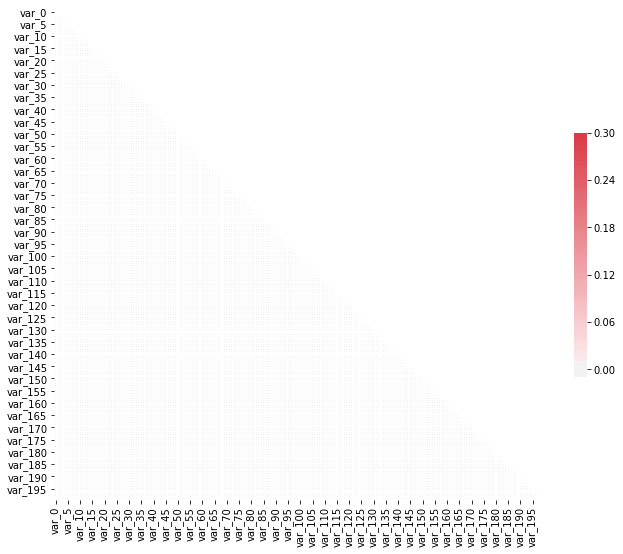

In [13]:
corr_matrix = train[columns_to_select].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train[columns_to_select])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
train_scaled=scaler.fit_transform(train[columns_to_select])

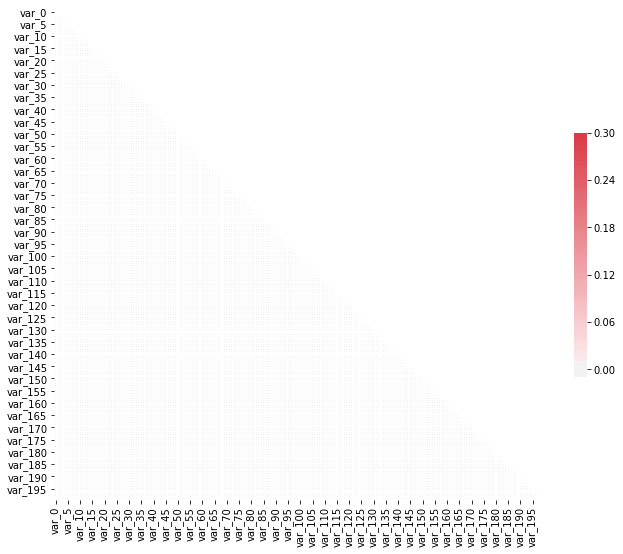

In [15]:
corr_matrix = pd.DataFrame(train_scaled,columns=columns_to_select).corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(.95)

In [8]:
pca.fit(train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.n_components_

190